In [2]:
import json
import os
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

plt.rcParams["font.family"] = "Times New Roman"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [46]:
data_dir = "/workspace/svd_subspace/outputs/ViT-B-32/single-task"
exp_data = defaultdict(list)


def _load_data(file_name):
    if not os.path.exists(file_name):
        print(f"File {file_name} does not exist")
        return
    with open(file_name) as f:
        data = json.load(f)
    accuracies = {}
    for key in data:
        if key == "model_info":
            continue
        accuracies[key] = data[key]["accuracy"]
    average_accuracy = np.mean(list(accuracies.values())) * 100
    for key in accuracies:
        exp_data[key].append(accuracies[key])
    exp_data["average"].append(average_accuracy)


for task in [
    "sun397",
    "stanford-cars",
    "resisc45",
    "eurosat",
    "svhn",
    "gtsrb",
    "mnist",
    "dtd",
]:
    for file_name, exp_class in zip(
        [
            f"clip-vit-base-patch32_{task}.json",
            f"projection_merging_zone1_{task}.json",
            f"projection_merging_zone2_{task}.json",
            f"projection_merging_zone23_{task}.json",
        ],
        ["Finetuned", "Space I", "Space II", "Space II & III"],
    ):
        if not os.path.exists(os.path.join(data_dir, file_name)):
            continue
        exp_data["exp_name"].append(file_name.split(".")[0])
        exp_data["exp_class"].append(exp_class)
        exp_data["task"].append(task)
        file_name = os.path.join(data_dir, file_name)
        _load_data(file_name)
        exp_data["task_accuracy"].append(exp_data[task.replace("-", "_")][-1])

file_name = os.path.join(data_dir, "clip-vit-base-patch32.json")
exp_data["exp_name"].append("clip-vit-base-patch32")
exp_data["exp_class"].append("Pretrained")
exp_data["task"].append("pretrained")
exp_data["task_accuracy"].append(exp_data["average"][-1])
_load_data(file_name)

exp_data = pd.DataFrame(exp_data)
exp_data

,exp_name,exp_class,task,svhn,stanford_cars,resisc45,eurosat,gtsrb,mnist,dtd,sun397,average,task_accuracy
0,clip-vit-base-patch32_sun397,Finetuned,sun397,0.282691,0.469593,0.543175,0.464815,0.264291,0.4433,0.416489,0.749673,45.425332,0.749673
1,projection_merging_zone1_sun397,Space I,sun397,0.330593,0.555030,0.594762,0.584815,0.274426,0.4899,0.409574,0.638690,48.472386,0.638690
2,projection_merging_zone2_sun397,Space II,sun397,0.327097,0.553662,0.592540,0.580000,0.294695,0.4793,0.419149,0.679950,49.079916,0.679950
3,projection_merging_zone23_sun397,Space II & III,sun397,0.316994,0.544335,0.590476,0.571481,0.306097,0.4611,0.428723,0.722872,49.275987,0.722872
4,clip-vit-base-patch32_stanford-cars,Finetuned,stanford-cars,0.302090,0.782987,0.508730,0.383704,0.306017,0.4971,0.418085,0.565995,47.058854,0.782987
5,projection_merging_zone1_stanford-cars,Space I,stanford-cars,0.326483,0.595946,0.593333,0.540370,0.285907,0.5070,0.411170,0.619446,48.495686,0.595946
6,projection_merging_zone2_stanford-cars,Space II,stanford-cars,0.312923,0.660863,0.589841,0.536296,0.291528,0.4970,0.414362,0.615063,48.973450,0.660863
7,projection_merging_zone23_stanford-cars,Space II & III,stanford-cars,0.313422,0.738341,0.577143,0.525185,0.303880,0.4853,0.421809,0.608615,49.671171,0.738341
8,clip-vit-base-patch32_resisc45,Finetuned,resisc45,0.238860,0.472205,0.951905,0.568889,0.242518,0.3968,0.358511,0.519950,46.870457,0.951905
9,projection_merging_zone1_resisc45,Space I,resisc45,0.319760,0.554160,0.655873,0.592593,0.284640,0.4772,0.406915,0.619144,48.878551,0.655873


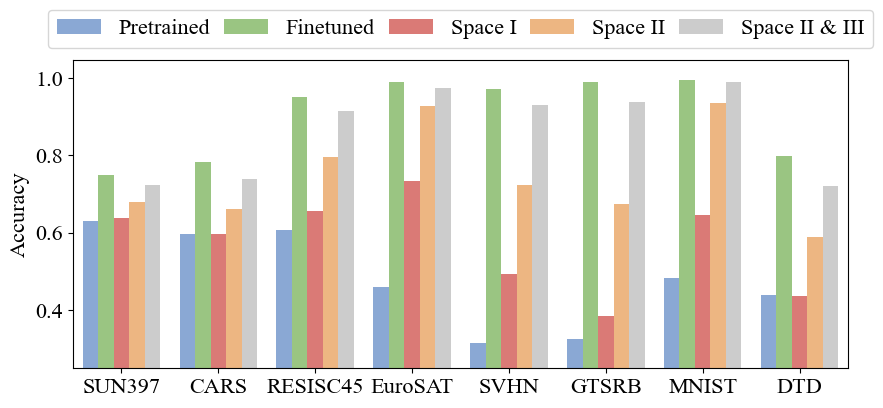

In [54]:
matplotlib.rcParams["font.size"] = 16

# plot bar chart of `exp_data`:
# exp_name	exp_class	svhn	stanford_cars	resisc45	eurosat	gtsrb	mnist	dtd	sun397	average
# 0	clip-vit-base-patch32_sun397	Finetuned	0.282691	0.469593	0.543175	0.464815	0.264291	0.4433	0.416489	0.749673	45.425332
# 1	projection_merging_low_sun397	Low	0.325330	0.555777	0.588571	0.570370	0.275693	0.4882	0.408511	0.626801	47.990666
# ...
fig, ax = plt.subplots(figsize=(10, 4))
plot_data = exp_data[exp_data["exp_class"] != "Pretrained"][
    ["task", "task_accuracy", "exp_class"]
]
_pretrained_data = defaultdict(list)
for task in [
    "sun397",
    "stanford-cars",
    "resisc45",
    "eurosat",
    "svhn",
    "gtsrb",
    "mnist",
    "dtd",
]:
    # append plot_data from the row 'Pretrained'
    _pretrained_data["task"].append(task)
    task = task.replace("-", "_")
    _pretrained_data["task_accuracy"].append(
        exp_data[exp_data["exp_class"] == "Pretrained"][task].values[0]
    )
    _pretrained_data["exp_class"].append("Pretrained")
plot_data = pd.concat([pd.DataFrame(_pretrained_data), plot_data], ignore_index=True)

sns.barplot(
    x="task",
    y="task_accuracy",
    hue="exp_class",
    data=plot_data,
    ax=ax,
    # 颜色
    palette=["#7EA6E0", "#97D077", "#EA6B66", "#FFB570", "#CCCCCC"],
)
ax.legend(
    title="",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),
    ncol=5,
    columnspacing=0.6,
)

# the xlabels to upper cases
ax.set_xticklabels(
    [
        x.get_text()
        .upper()
        .replace("STANFORD-CARS", "CARS")
        .replace("EUROSAT", "EuroSAT")
        for x in ax.get_xticklabels()
    ]
)
ax.set_ylabel("Accuracy")
ax.set_xlabel("")
ax.set_ylim((0.25, ax.get_ylim()[1]))
plt.savefig("single_task.pdf", bbox_inches="tight")
plt.show()